**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import minimize, fsolve

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

Using sympy, we optimize the labor supply in the exam.py file.

In [25]:
from exam import q11_solve_equation
solution = q11_solve_equation()
print("The solution is", solution)

The solution is [(kappa*nu - sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1)), (kappa*nu + sqrt(nu*(4*alpha*tau**2*w**2 - 8*alpha*tau*w**2 + 4*alpha*w**2 + kappa**2*nu)))/(2*nu*w*(tau - 1))]


Sympy has returned two solutions because the equation we are solving is quadratic. Unfortunately, SYMPY has done derrivations beyond the given solution. The two solutions are:
$\frac{\kappa\nu - \sqrt{\nu(4\alpha\tau^2w^2 - 8\alpha\tau w^2 + 4\alpha w^2 + \kappa^2\nu)}}{2\nu w (\tau - 1)}$
and
$\frac{\kappa\nu + \sqrt{\nu(4\alpha\tau^2w^2 - 8\alpha\tau w^2 + 4\alpha w^2 + \kappa^2\nu)}}{2\nu w (\tau - 1)}$

We will now simplify to reach the desired outcome:
The numerator in the square root is the term that needs simplifying. Let's write it in a more compact form and simplify it:

$4\alpha\tau^2w^2 - 8\alpha\tau w^2 + 4\alpha w^2$

Factor out $4\alpha w^2$:

$4\alpha w^2 (\tau^2 - 2\tau + 1)$

$(\tau^2 - 2\tau + 1)$=$(\tau - 1)^2$. Therefore:

$4\alpha w^2 (\tau - 1)^2$

Remember that we defined $\tilde{w} = (1 - \tau)w$, so this can be simplified further to:
$4\alpha\tilde{w}^2$
Substituting this back into the solutions, we get:

$\frac{-\kappa + \sqrt{\kappa^2 + 4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$ and

$\frac{-\kappa - \sqrt{\kappa^2 + 4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$
The second solution is not valid in this context because labor cannot be negative. Therefore, the valid solution is the first one and we have verified the optimal $L^{\star}(\tilde{w})$.

We see that G is not included in the optimal L*, and as such this is the solution for both $G\in\left\{1.0 , 2.0\right\}$.


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In the exam.py file, we plot the optimal labor for values of w.

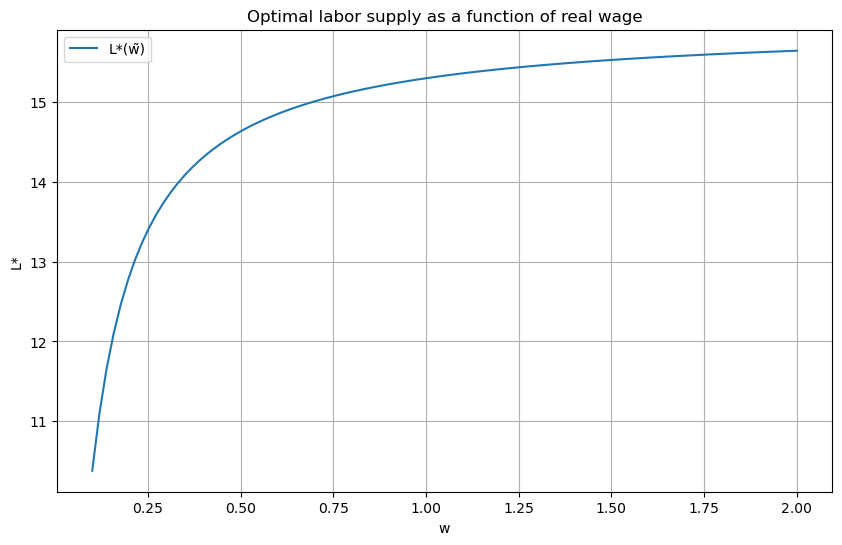

In [26]:
from exam import q12_plot_optimal_labor

# Call the function to display the plot
q12_plot_optimal_labor()

We see that the optimal labour supply increases when the wage increases up to a cetain point around 16 hours. This can be explained by the tax rate being 30%, thus above a certain threshold the extra effort of working is not met by an equal compensation of consumption, especially given that the marginal utility rate of government consumption and consumption is decreasing in scale.

In the figure aswell we can see that at even very low level of employment the labour supply is still quite high at around 11 hours. This can be explained by the cost of labour being very low, being weightet by $v/2$, which is a very small number. In a model containing utlity of free time the optimal labour supply curve would be quite different. 


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In the exam.py file, we use numpy and matplotlib.plyplot to first calculate the grid of L and G parameters and storing them afterwards.

c:\Users\emil0\Downloads\projects-2023-best-team\exam.py:78: RuntimeWarning: divide by zero encountered in log
  utility = np.log((kappa + (1 - tau) * w * L_star)**alpha * G**(1 - alpha)) - nu * L_star**2 / 2
c:\Users\emil0\Downloads\projects-2023-best-team\exam.py:76: RuntimeWarning: invalid value encountered in double_scalars
  L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)


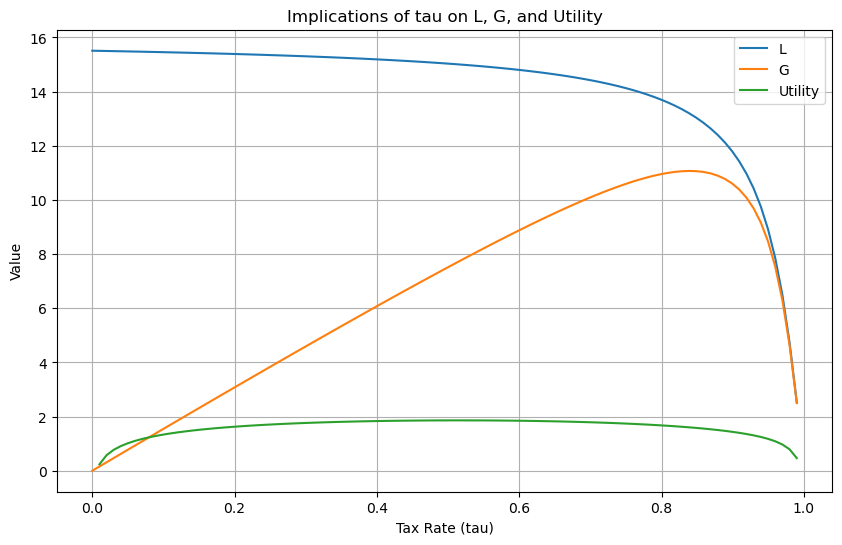

In [27]:
from exam import q13_plot_implications
# Call the function to display the plot
q13_plot_implications()

This figure displays a more detailed version of the laffer curve, showing that even given that government consumption gives utility, above a certain rate of taxation the labour supply decreases and thus the government consumption itself decreases when the marginal taxation gets too high. In this graph we can also see that the maximum utility seems to be between 40% and 50%, which can be explained by alpha being 0.5 meaning the marginal utility of government consumption is equal to the marginal utility of consumption and thus the allocations should optimally be more or less equal given differences in other variables.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In the exam.py file, we use numpy to numerically optimize tax rates, we calculate different utilities for different tax rates and store them to display in the figure below.

Optimal tax rate (tau_star): 0.5145311264139927
Maximized worker utility: 1.8591992509323028


c:\Users\emil0\Downloads\projects-2023-best-team\exam.py:112: RuntimeWarning: divide by zero encountered in log
  utility = np.log((kappa + (1 - tau) * w * L_star)**alpha * (tau * w * L_star)**(1 - alpha)) - nu * L_star**2 / 2
c:\Users\emil0\Downloads\projects-2023-best-team\exam.py:111: RuntimeWarning: invalid value encountered in double_scalars
  L_star = (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)


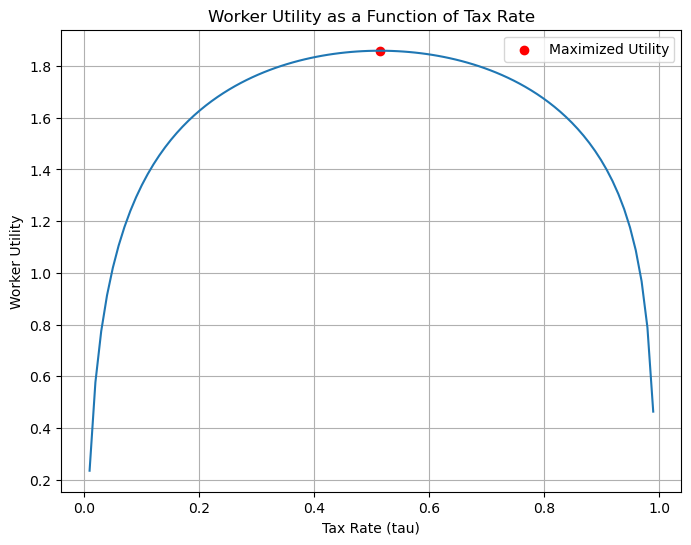

In [28]:
from exam import q14_find_optimal_tax, q14_plot_graph

tau_star, utility_star = q14_find_optimal_tax()
print("Optimal tax rate (tau_star):", tau_star)
print("Maximized worker utility:", utility_star)

q14_plot_graph()

This graph expands on the utlity graph from question 3, we see that above a set level of taxation (calculated to 51%) an increase in the tax rate actually decreases worker utility.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using $\tau$=0,51 based on this.*

In the py-file we have combined the questions 5 and 6 into one calculation. We first use numpy to calculate the optimal labour rate and afterwards optimize for G and $\tau$, we do this for both sets of $\sigma$ and the $\rho$.

In [29]:
from exam import find_optimal_G, find_optimal_tau, set1, set2

tau_q5 = 0.54
G_q5_set1 = find_optimal_G(tau_q5, set1)
G_q5_set2 = find_optimal_G(tau_q5, set2)

print(f"Optimal G for Set 1: {G_q5_set1[0]}")
print(f"Optimal G for Set 2: {G_q5_set2[0]}")

Optimal G for Set 1: 8.063562097736236
Optimal G for Set 2: 5.1638622159012195


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

We did not to put the rest of our calculations in the py-file, as such below we...

In [30]:
# define constants
alpha = 0.5
kappa = 1.0
nu = 1/(2*16**2)
w = 1.0

# define parameter sets
set1 = {'sigma': 1.001, 'rho': 1.001, 'epsilon': 1.0}
set2 = {'sigma': 1.5, 'rho': 1.5, 'epsilon': 1.0}

# utility function
def utility(L, G, tau, params):
    C = kappa + (1 - tau)*w*L
    term1 = (alpha*C**((params['sigma']-1)/params['sigma']) + (1-alpha)*G**((params['sigma']-1)/params['sigma']))**(params['sigma']/(params['sigma']-1))
    term2 = nu*L**(1+params['epsilon']) / (1+params['epsilon'])
    return (term1**(1-params['rho']) - 1)/(1 - params['rho']) - term2

# find optimal L for given G and tau
def find_L_star(G, tau, params):
    result = minimize(lambda L: -utility(L, G, tau, params), [12.0], method='L-BFGS-B', bounds=[(0, 24)])
    return result.x[0]

# question 5: find G that solves the given equation
tau_q5 = 0.54
G_q5_set1 = fsolve(lambda G: G - tau_q5*w*find_L_star(G, tau_q5, set1), [1])
G_q5_set2 = fsolve(lambda G: G - tau_q5*w*find_L_star(G, tau_q5, set2), [1])
# question 6: find socially optimal tax rate
def social_optimum(tau, params):
    G = fsolve(lambda G: G - tau*w*find_L_star(G, tau, params), [4])
    return -utility(find_L_star(G, tau, params), G, tau, params)

tau_star_set1 = minimize(social_optimum, [0.51], args=(set1), method='L-BFGS-B', bounds=[(0, 1)])
tau_star_set2 = minimize(social_optimum, [0.51], args=(set2), method='L-BFGS-B', bounds=[(0, 1)])

print(f"Optimal G for Set 1: {G_q5_set1[0]}, Optimal Tax Rate for Set 1: {tau_star_set1.x[0]}")
print(f"Optimal G for Set 2: {G_q5_set2[0]}, Optimal Tax Rate for Set 2: {tau_star_set2.x[0]}")


c:\Users\emil0\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\emil0\AppData\Local\Temp\ipykernel_11468\327640330.py:14: RuntimeWarning: invalid value encountered in power
  term1 = (alpha*C**((params['sigma']-1)/params['sigma']) + (1-alpha)*G**((params['sigma']-1)/params['sigma']))**(params['sigma']/(params['sigma']-1))


Optimal G for Set 1: 8.063562097736236, Optimal Tax Rate for Set 1: 0.5107706445849184
Optimal G for Set 2: 5.1638622159012195, Optimal Tax Rate for Set 2: 0.46310460946928433


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

To verify that the above given function  is the correct solution we first solve it analytically using sympy to calculate a simple optimization.

In [31]:
ell_t, kappa_t, eta, w = sp.symbols('ell_t kappa_t eta w')

Pi_t = kappa_t * ell_t**(1 - eta) - w * ell_t

dPi_dell_t = sp.Eq(0,sp.diff(Pi_t, ell_t))
dPi_dell_t

Eq(0, -w + ell_t**(1 - eta)*kappa_t*(1 - eta)/ell_t)

We solve for ell_t and simplify using sympy:

In [32]:
optimal_ell_t = sp.solve(dPi_dell_t, ell_t)
simplified_eq = sp.Eq(ell_t,(sp.simplify(optimal_ell_t[0])))
simplified_eq

Eq(ell_t, (kappa_t*(1 - eta)/w)**(1/eta))

To confirm that this indeed is the optimal equation for labour for both $\kappa=1$ and $\kappa=2$ we maximize profits for both function to see if we find the same optimal employment, this also provides us confirmation numerically that this is the optimal solution.

In [33]:

# Define the profit function
profit = kappa_t * ell_t**(1 - eta) - w * ell_t

# Set the baseline parameters
eta_value = 0.5
w_value = 1.0

# Calculate the profit for different values of ell_t and verify the maximum
kappa_values = [1.0, 2.0]
for kappa in kappa_values:
    # Calculate the ell_t that maximizes the profit
    ell_optimal = sp.solve(sp.diff(profit.subs([(kappa_t, kappa), (eta, eta_value), (w, w_value)]), ell_t), ell_t)[0]
    # Calculate the maximum profit
    profit_max = profit.subs([(kappa_t, kappa), (eta, eta_value), (w, w_value), (ell_t, ell_optimal)])
    
    # Ensure ell_optimal is a whole number
    ell_optimal = sp.ceiling(ell_optimal)
    
    # Print the results
    print(f'For kappa = {kappa}:')
    print(f'The optimal number of hairdressers (ell_t) is: {ell_optimal.evalf()}')
    print(f'The maximum profit is: {profit_max.evalf()}\n')

For kappa = 1.0:
The optimal number of hairdressers (ell_t) is: 1.00000000000000
The maximum profit is: 0.250000000000000

For kappa = 2.0:
The optimal number of hairdressers (ell_t) is: 1.00000000000000
The maximum profit is: 1.00000000000000



Now that we have verified and derived the expression that maximises profits for the hair salon, we can subsitute the values of $\kappa$, n, and w into the formula.
We verify that the expression maximises profits for kappa at 1 and 2. 
With a demand shock (kappa) at 1, the optimal number of hairdressers is 0.25 (perhaps a part time hire). This gives a maximum profit of 0.25. 
with a demand shock at 2, the optimal number of hairdressers is 1. This gives a maximum profit of 1, accordingly

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [34]:
# We first imput the values for our paramaters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
eta = 0.5  
w = 1  
T = 120    # This is the number periods. 10 years as the text requests.
K = 10000  # This is the number of shock series for Monte Carlo approximation.
# We first create the array to store the values of h for each shock series
h_values = np.zeros(K)

# Generate K shock series as given by the model
np.random.seed(0)  # for reproducibility
shock_series = np.random.normal(loc=-0.5*sigma_epsilon**2, scale=sigma_epsilon, size=(K, T))

# We create a loop over the shock series!
for k in range(K):
    # We create arrays and intial values for l and kappa in period 0.
    kappa = np.zeros(T)
    kappa[0] = np.exp(rho * np.log(1) + shock_series[k, 0])  # initial kappa
    l = np.zeros(T)
    l[0] = ((1-eta)*kappa[0]/w)**(1/eta)  # initial l
    
    # We then calculate the rest l_t and kappa_t for the rest of our periodsm, t = 1, ..., T-1
    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + shock_series[k, t])
        l[t] = ((1-eta)*kappa[t]/w)**(1/eta)
    
    # We calculate all the h's for our shock series
    adjustment_cost = iota * np.sum(l[1:] != l[:-1])
    profit = np.sum((kappa * l**(1-eta) - w * l) * R**-np.arange(T)) - adjustment_cost
    h_values[k] = profit

# Finally, we have the ex-ante expected value H is the average of these values
H = np.mean(h_values)
print(H)

27.693592041332398


We have chosen to run 10.000 simulations to get an aproximate result, we find a expected value of the hairdressers bussiness to be 27,69 of course given small changes caused by the random shocks. For reproducable results we have seeded our simulation.

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

This is pretty much the same calculation as 2.2, except that we add the policy.

In [35]:
# We define the baseline parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
eta = 0.5
w = 1.0   
T = 120    # No. of periods
K = 10000  # No. of shock series for Monte Carlo

# Empty array to store the values of h for each shock series
h_values = np.zeros(K)

# Generate K shock series, but first we add a seed for replicability!
np.random.seed(0) 
shock_series = np.random.normal(loc=-0.5*sigma_epsilon**2, scale=sigma_epsilon, size=(K, T))

# We create the loop over the shock series
for k in range(K):
    # Create kappa and l in period 0.
    kappa = np.zeros(T)
    kappa[0] = np.exp(rho * np.log(1) + shock_series[k, 0])  # initial kappa
    l = np.zeros(T)
    l_star_initial = ((1-eta)*kappa[0]/w)**(1/eta)
    l[0] = l_star_initial  # initial l

    # Find l_t and kappa_t for the later periods, t = 1, ..., T-1
    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + shock_series[k, t])
        l_star = ((1-eta)*kappa[t]/w)**(1/eta)
        #Here is when it gets interesting! We implement the policy to get new l[t]
        if np.abs(l[t-1] - l_star) > 0.05:
            l[t] = l_star
        else:
            l[t] = l[t-1]

    
    # Calculate h for this shock series, like we did in 2.2.
    adjustment_cost = iota * np.sum(l[1:] != l[:-1])
    profit = np.sum((kappa * l**(1-eta) - w * l) * R**-np.arange(T)) - adjustment_cost
    h_values[k] = profit

# We create the ex-ante expected value H.
H_new_policy = np.mean(h_values)

# And we finally compare with the previous policy
profitability_improvement = H_new_policy - H

print("H with delta5 policy:", H_new_policy)
print("Difference in H:", profitability_improvement)

H with delta5 policy: 28.411887191796524
Difference in H: 0.718295150464126


We find a slight yet significant improvement in profitability caused by the new policy. This can be explained by that by not adjusting employment under small productivity shocks, the company does not have to face frequent adjustments costs. 

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

This one we actually did in the py file! It is very similar to our work in Q2. In this code we simply calculate the expected value of the firm given the delta of 8, which we calculated to be the most effective in 2.4, we will use it in 2.5 to compare to an alternative policy.

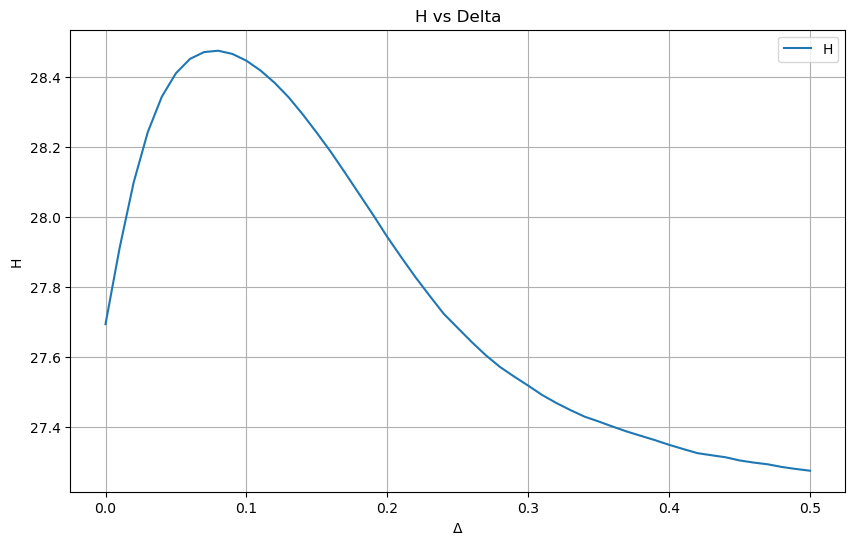

The optimal Delta that maximizes H is 0.08


In [36]:
from exam import q24_calculate_H_values, q24_find_optimal_Delta, q24_plot_H_vs_Delta

# We define the range of Delta values to test. We go for a very low delta for precision.
Delta_values = np.arange(0, 0.51, 0.01)

# We call the function to calculate H_values
H_values = q24_calculate_H_values(Delta_values)

# We call the function to plot H against Delta
q24_plot_H_vs_Delta(Delta_values, H_values)

# We find the Delta value that maximizes H
optimal_Delta = q24_find_optimal_Delta(Delta_values, H_values)
print(f'The optimal Delta that maximizes H is {optimal_Delta}')


This code is quite slow to run and took us about 4 minutes, however to effectively calculate and save the deltas over several simulations we have not found an effective way to optimize it while retaining high precision. We see that delta should be slightly higher than our original policy.


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



First, we implement the optimal solution from the last question, which will obviously be a superior policy. We set delta=0.08.

In [37]:
# We define the baseline parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
eta = 0.5
w = 1.0   
T = 120    # No. of periods
K = 10000  # No. of shock series for Monte Carlo

# Empty array to store the values of h for each shock series
h_values = np.zeros(K)

# Generate K shock series, but first we add a seed for replicability!
np.random.seed(0) 
shock_series = np.random.normal(loc=-0.5*sigma_epsilon**2, scale=sigma_epsilon, size=(K, T))

# We create the loop over the shock series
for k in range(K):
    # Create kappa and l in period 0.
    kappa = np.zeros(T)
    kappa[0] = np.exp(rho * np.log(1) + shock_series[k, 0])  # initial kappa
    l = np.zeros(T)
    l_star_initial = ((1-eta)*kappa[0]/w)**(1/eta)
    l[0] = l_star_initial  # initial l

    # Find l_t and kappa_t for the later periods, t = 1, ..., T-1
    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + shock_series[k, t])
        l_star = ((1-eta)*kappa[t]/w)**(1/eta)
        #Here is when it gets interesting! We implement the policy to get new l[t]
        if np.abs(l[t-1] - l_star) > 0.08:
            l[t] = l_star
        else:
            l[t] = l[t-1]

    
    # Calculate h for this shock series, like we did in 2.2.
    adjustment_cost = iota * np.sum(l[1:] != l[:-1])
    profit = np.sum((kappa * l**(1-eta) - w * l) * R**-np.arange(T)) - adjustment_cost
    h_values[k] = profit

# We create the ex-ante expected value H.
H_opt_policy = np.mean(h_values)

# And we finally compare with the previous policy
profitability_improvement = H_opt_policy - H

print("H with delta8 policy:", H_opt_policy)
print("Difference in H:", profitability_improvement)

H with delta8 policy: 28.47623127025638
Difference in H: 0.7826392289239834


delta=0.08 yeilds an even better valuation, as expected.

We also make our own alternative policy! We aim to improve profitability by taking into account the past 5 time periods, instead of just the previous one, when deciding to hire or fire. The thought is that the model would be less sensitive to a recent erratic change/shock. It should mean a more stabile employment policy as shocks for a single year are not met with as drastic adjustments. This policy makes adjustments less likley to happen based on a possible short-term demand-shock.

In [38]:
# We define the baseline parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1+0.01)**(1/12)
eta = 0.5
w = 1.0   
T = 120    # No. of periods
K = 10000  # No. of shock series for Monte Carlo

# Empty array to store the values of h for each shock series
h_values = np.zeros(K)

# Generate K shock series, but first we add a seed for replicability!
np.random.seed(0) 
shock_series = np.random.normal(loc=-0.5*sigma_epsilon**2, scale=sigma_epsilon, size=(K, T))

data = (l[t-1],l[t-2],l[t-3],l[t-4],l[t-5])
t5 = np.mean(data)

# We create the loop over the shock series
for k in range(K):
    # Create kappa and l in period 0.
    kappa = np.zeros(T)
    kappa[0] = np.exp(rho * np.log(1) + shock_series[k, 0])  # initial kappa
    l = np.zeros(T)
    l_star_initial = ((1-eta)*kappa[0]/w)**(1/eta)
    l[0] = l_star_initial  # initial l

    # Find l_t and kappa_t for the later periods, t = 1, ..., T-1
    for t in range(1, T):
        kappa[t] = np.exp(rho * np.log(kappa[t-1]) + shock_series[k, t])
        l_star = ((1-eta)*kappa[t]/w)**(1/eta)
        # Update l[t] based our new and improved policy
        if np.abs(t5 - l_star) > 0.05:
            l[t] = l_star
        else:
            l[t] = t5

    
    # W calculate h for this shock series
    adjustment_cost = iota * np.sum(l[1:] != l[:-1])
    profit = np.sum((kappa * l**(1-eta) - w * l) * R**-np.arange(T)) - adjustment_cost
    h_values[k] = profit

# We calculate H like all the other times.
H_own_policy = np.mean(h_values)

# And we compare with the previous policy
profitability_improvement = H_own_policy - H

print("H with (our) innovative new policy!:", H_own_policy)
print("Difference in H:", profitability_improvement)

H with (our) innovative new policy!: 27.978862052307864
Difference in H: 0.28527001097546645


To get an overview of the different policy outcomes we create a table:

In [39]:
from tabulate import tabulate
#We define our results as a list
results = [
    ["Delta= 0", H],
    ["Delta=0.05", H_new_policy],
    ["Delta=0.08", H_opt_policy],
    ["Delta over 5 t", H_own_policy]
]
#and we create a table
headers = ["Simulation", "Expected value", ]
table = tabulate(results, headers, tablefmt="fancy_grid")
print(table)

╒════════════════╤══════════════════╕
│ Simulation     │   Expected value │
╞════════════════╪══════════════════╡
│ Delta= 0       │          27.6936 │
├────────────────┼──────────────────┤
│ Delta=0.05     │          28.4119 │
├────────────────┼──────────────────┤
│ Delta=0.08     │          28.4762 │
├────────────────┼──────────────────┤
│ Delta over 5 t │          27.9789 │
╘════════════════╧══════════════════╛


We find that by calculating delta over 5 periods to sort out smaller shocks, the expected value of the company is higher than always adjusting, however it's lower than using the policy of delta=0.05 as we might adjust too little with this new policy. As we see in figure 4 the optimal policy for delta is 0.08 which also has a highest valuation.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [40]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

We implement the above mentioned refined global optimizer on the Griewank function, moreover we also store the results so we can plot the first guesses by iteration, lastly we calculate the average number of iterations before reaching the 0 point 100 times to more robustly test its accuracy.

In the following code we implement the equations given above for the optimizer. First, we consider the case where k is larger than K, which means the guesses after the warmup period. Then we try the guesses and modify them with the algorithm given, if they do not match, this process of refining continues until our guesses are within the tolerance range of $\tau$.

The average number of iterations is: 314.3!


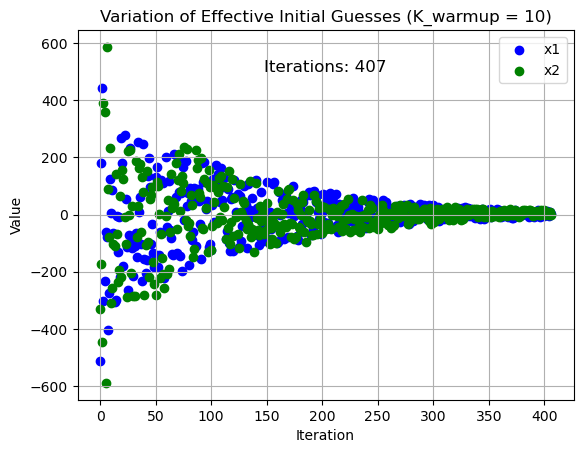

In [41]:
# We import the necessary libraries
np.random.seed(0)  # We set the random seed for reproducibility

# Defining the objective and Griewank functions
def objective_function(x):
    return griewank([x[0], x[1]])

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

# We implement the refined global optimizer function
def refined_global_optimizer(bounds, tau, K_warmup, K, optimizer):
    x_star = None
    x0_values = []
    for k in range(K):
        # We generate a random initial point within the bounds
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= K_warmup:
            # We compute a weighted combination of the current point and the best-found point
            chi_k = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k

        # We minimize the objective function starting from the initial point
        res = minimize(objective_function, x_k0, method=optimizer, tol=tau)
        x_k_star = res.x

        # We update the best-found point if the new solution improves the objective function
        if x_star is None or objective_function(x_k_star) < objective_function(x_star):
            x_star = x_k_star

        x0_values.append(x_k0)

        # We stop the optimization if the objective function value is below the tolerance
        if objective_function(x_star) < tau:
            break

    return x_star, x0_values, k + 1

# We set up the parameters for the optimization process
bounds = [-600, 600]  # We define the search space bounds
tau = 1e-8  # We specify the convergence tolerance
K_warmup = 10  # We set the warm-up period
K = 1000  # We determine the maximum number of iterations
optimizer = 'BFGS'  # We select the optimization method
num_runs = 100  # We set the number of times to run the algorithm

# We initialize a list to store the number of iterations
iterations_list = []

# We run the algorithm multiple times
for _ in range(num_runs):
    _, _, iterations = refined_global_optimizer(bounds, tau, K_warmup, K, optimizer)
    iterations_list.append(iterations)

# We calculate the average number of iterations
avg_iterations = np.mean(iterations_list)

# We proudly print the average number of iterations!
print(f"The average number of iterations is: {avg_iterations}!")

# We now run our refined global optimizer and create a marvelous plot!
x_star, x0_values, iterations = refined_global_optimizer(bounds, tau, K_warmup, K, optimizer)
x0_values = np.array(x0_values)
x1_values = x0_values[:, 0]
x2_values = x0_values[:, 1]

# We create a scatter plot to visualize the variation of effective initial guesses
plt.scatter(range(len(x1_values)), x1_values, c='blue', label='x1')
plt.scatter(range(len(x2_values)), x2_values, c='green', label='x2')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title(f'Variation of Effective Initial Guesses (K_warmup = {K_warmup})')
plt.legend()
plt.grid(True)
plt.text(0.5, 0.9, f'Iterations: {iterations}', transform=plt.gca().transAxes, ha='center', va='center', fontsize=12)

# We proudly display the plot!
plt.show()


The Griewank function is a function with an abundant amount of local maxima and minima making it an optimal function to test seaching algoritithm to see if they identify the correct maximum point. In this scenario the true minimum, which our algorithm seaches for is 0, and as we can see in the figure after around 350 iterations, we approach the actual minimum of 0. To give a more robust evaluation of the algorithm we run it a 100 times and calculate the average number of iterations needed before hitting the 0 point. We calculate this number to be 314.3 at seed (0).

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

By increasing the number of warmup iterations we increase the number of times the algortithm runs before adjusting for each initial guess, thus giving us a tradeoff in algoriithm effectiveness by "sacrifizing" more unadjusted guesses to train to the algorithm to be more effective in the guesses afterwards. To test this we run the algorithm a 100 times and calculate the average number of iterations needed for each algorithm before hitting the 0 point to better compare the effectiveness.

We implement the exact same code as in question 3.1 except increasing the number of warmups to 100.

We've successfully calculated the average number of iterations: 399.18!


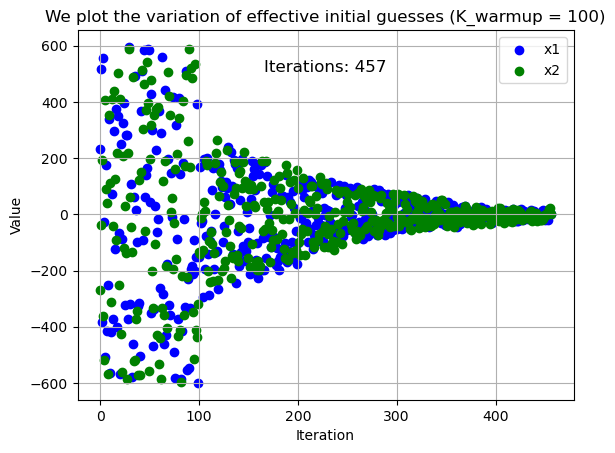

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# We set the random seed for reproducibility
np.random.seed(0)

# We define the objective and Griewank functions
def objective_function(x):
    return griewank([x[0], x[1]])

def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1 ** 2 / 4000 + x2 ** 2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

# We implement the refined global optimizer function
def refined_global_optimizer(bounds, tau, K_warmup, K, optimizer):
    x_star = None
    x0_values = []
    for k in range(K):
        # We generate a random initial point within the bounds
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k >= K_warmup:
            # We apply a weighted combination of the current point and the best-found point
            chi_k = 0.50 * (2 / (1 + np.exp((k - K_warmup) / 100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k

        # We minimize the objective function starting from the initial point
        res = minimize(objective_function, x_k0, method=optimizer, tol=tau)
        x_k_star = res.x

        # We update the best-found point if the new solution improves the objective function
        if x_star is None or objective_function(x_k_star) < objective_function(x_star):
            x_star = x_k_star

        x0_values.append(x_k0)

        # We stop the optimization if the objective function value is below the tolerance
        if objective_function(x_star) < tau:
            break

    return x_star, x0_values, k+1

# We set the parameters for the optimization process
bounds = [-600, 600]
tau = 1e-8
K_warmup = 100
K = 1000
optimizer = 'BFGS'
num_runs = 100

# We initialize a list to store the number of iterations
iterations_list = []

# We run the algorithm multiple times
for _ in range(num_runs):
    _, _, iterations = refined_global_optimizer(bounds, tau, K_warmup, K, optimizer)
    iterations_list.append(iterations)

# We calculate the average number of iterations
avg_iterations = np.mean(iterations_list)

# We proudly print the average number of iterations!
print(f"We've successfully calculated the average number of iterations: {avg_iterations}!")

# We run the refined global optimizer and plot the variation of effective initial guesses
x_star, x0_values, iterations = refined_global_optimizer(bounds, tau, K_warmup, K, optimizer)
x0_values = np.array(x0_values)
x1_values = x0_values[:, 0]
x2_values = x0_values[:, 1]

# We create a scatter plot to visualize the variation of effective initial guesses
plt.scatter(range(len(x1_values)), x1_values, c='blue', label='x1')
plt.scatter(range(len(x2_values)), x2_values, c='green', label='x2')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title(f"We plot the variation of effective initial guesses (K_warmup = {K_warmup})")
plt.legend()
plt.grid(True)
plt.text(0.5, 0.9, f"Iterations: {iterations}", transform=plt.gca().transAxes, ha='center', va='center', fontsize=12)

# We proudly display the plot!
plt.show()


By running each version of the "search" algorithm 100 times we compare the average number of iterations needed, of course we can theoretically make a more precise comparison by increasing the number of simulation, however this also increases the amount of time it takes for python to proccess. That said, with 100 simulations we find that actually the version with a smaller amount of warmups is more effective at reaching the end point. However, if we do not include the warmups as actual guesses and subtract them, then the second algorithm with the higher number of warmups is slightly faster. With seed(0) we get 399.18.

In [43]:
from tabulate import tabulate

#We define our results as a list
results = [
    ["Warmup = 10 ", 314.3, 304.3],
    ["Warmup =100", 399.18, 299.18],   
]

# Define the headers for your table
headers = ["Warmup", "Average Iterations", "Excluding warmup" ]

# Use the tabulate function to format the table
table = tabulate(results, headers, tablefmt="fancy_grid")

# Print the table
print(table)

╒═════════════╤══════════════════════╤════════════════════╕
│ Warmup      │   Average Iterations │   Excluding warmup │
╞═════════════╪══════════════════════╪════════════════════╡
│ Warmup = 10 │                  377 │                367 │
├─────────────┼──────────────────────┼────────────────────┤
│ Warmup =100 │                  476 │                376 │
╘═════════════╧══════════════════════╧════════════════════╛


The previous mentioned result is highlightet in this table, with the results being calculated in seed(0) which underscores that if we do include the warmups then the K=10 is most effective, but if we exclude the warmup iterations, perhaps because they are less intensive, the algorithm with the higher number of warmup is most effective.